# Purpose of the Notebook:
The purpose of this notebook was first to create a feature list with the required values like min, max, mean. This was later revised because the previous min/max values were not very plausible due to the outliers that were included. Therefore, they were recalculated excluding the outliers, which was made clear by the box plots.

In [1]:
# imports
import pandas as pd
import X1_DataPreparation as data_prep
import orga_functions as org

In [2]:
# call data 
df = pd.read_csv(org.path("01_AirQuality_processed.csv"), sep=';')

In [3]:
df

,date,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
0,2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,2005-02-06 19:00:00,1.6,985.0,NaN,4.5,NaN,227.0,891.0,165.0,875.0,774.0,6.0,38.0,0.3584
7994,2005-02-06 20:00:00,1.8,1002.0,NaN,5.3,780.0,252.0,855.0,179.0,892.0,857.0,5.8,36.4,0.3385
7995,2005-02-06 21:00:00,1.4,938.0,NaN,3.7,NaN,193.0,937.0,149.0,805.0,737.0,5.8,35.4,0.3286
7996,2005-02-06 22:00:00,1.1,896.0,NaN,2.6,NaN,158.0,1033.0,126.0,782.0,610.0,5.4,36.6,0.3304


## Preparations for the FeatureList 

In [4]:
# count() per column indicates missing values
df.describe()

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,6159.000000,7615.000000,859.000000,7506.000000,5733.000000,5966.000000,7495.00000,6304.000000,7584.000000,7625.000000,7707.000000,7709.000000,7709.000000
mean,2.043871,1089.757321,183.214203,9.795057,1051.347811,193.833389,825.35477,104.855330,1493.766350,1011.029770,19.469560,48.969244,1.082099
std,1.230393,207.104380,149.767756,6.437832,210.126781,143.300945,219.59691,41.937012,310.666962,375.246415,8.654047,17.286378,0.394650
min,0.100000,647.000000,7.000000,0.100000,749.000000,2.000000,322.00000,2.000000,702.000000,253.000000,0.300000,9.200000,0.198800
25%,1.100000,930.000000,66.000000,4.600000,880.000000,84.250000,667.00000,73.000000,1303.000000,735.000000,13.100000,35.500000,0.816700
50%,1.800000,1058.000000,137.000000,8.400000,1014.000000,152.000000,809.00000,103.000000,1503.000000,956.000000,19.300000,49.400000,1.046800
75%,2.800000,1225.000000,260.500000,13.900000,1189.000000,267.000000,966.00000,131.000000,1696.250000,1256.000000,25.400000,62.100000,1.371300
max,5.600000,1683.000000,642.000000,28.900000,1701.000000,625.000000,1452.00000,220.000000,2307.000000,2073.000000,43.400000,88.700000,2.231000


Fill Nan-Values ones with mean an ones with median 

In [5]:
df.fillna(df.mean(numeric_only=True)).describe()

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000
mean,2.043871,1089.757321,183.214203,9.795057,1051.347811,193.833389,825.354770,104.855330,1493.766350,1011.029770,19.469560,48.969244,1.082099
std,1.079692,202.084113,49.056710,6.236650,177.897953,123.762972,212.578589,37.231248,302.518578,366.390705,8.495133,16.971151,0.387453
min,0.100000,647.000000,7.000000,0.100000,749.000000,2.000000,322.000000,2.000000,702.000000,253.000000,0.300000,9.200000,0.198800
25%,1.300000,937.000000,183.214203,4.900000,930.000000,105.000000,678.250000,82.000000,1314.000000,746.000000,13.300000,36.125000,0.825325
50%,2.043871,1071.000000,183.214203,8.900000,1051.347811,193.833389,825.354770,104.855330,1493.766350,979.500000,19.469560,48.969244,1.064750
75%,2.400000,1214.000000,183.214203,13.400000,1116.000000,220.000000,952.000000,123.000000,1683.000000,1236.000000,25.100000,61.600000,1.358525
max,5.600000,1683.000000,642.000000,28.900000,1701.000000,625.000000,1452.000000,220.000000,2307.000000,2073.000000,43.400000,88.700000,2.231000


In [6]:
df.fillna(df.median(numeric_only=True)).describe()

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000
mean,1.987797,1088.236559,141.963491,9.709240,1040.771068,183.205051,824.326207,104.462366,1494.244311,1008.463366,19.463391,48.984809,1.080823
std,1.084559,202.197866,51.101212,6.245653,178.692103,125.095854,212.615669,37.238965,302.525496,366.574423,8.495193,16.971342,0.387509
min,0.100000,647.000000,7.000000,0.100000,749.000000,2.000000,322.000000,2.000000,702.000000,253.000000,0.300000,9.200000,0.198800
25%,1.300000,937.000000,137.000000,4.900000,930.000000,105.000000,678.250000,82.000000,1314.000000,746.000000,13.300000,36.125000,0.825325
50%,1.800000,1058.000000,137.000000,8.400000,1014.000000,152.000000,809.000000,103.000000,1503.000000,956.000000,19.300000,49.400000,1.046800
75%,2.400000,1214.000000,137.000000,13.400000,1116.000000,220.000000,952.000000,123.000000,1683.000000,1236.000000,25.100000,61.600000,1.358525
max,5.600000,1683.000000,642.000000,28.900000,1701.000000,625.000000,1452.000000,220.000000,2307.000000,2073.000000,43.400000,88.700000,2.231000


In [7]:
df = df[df != -200]
df

,date,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
0,2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,2005-02-06 19:00:00,1.6,985.0,NaN,4.5,NaN,227.0,891.0,165.0,875.0,774.0,6.0,38.0,0.3584
7994,2005-02-06 20:00:00,1.8,1002.0,NaN,5.3,780.0,252.0,855.0,179.0,892.0,857.0,5.8,36.4,0.3385
7995,2005-02-06 21:00:00,1.4,938.0,NaN,3.7,NaN,193.0,937.0,149.0,805.0,737.0,5.8,35.4,0.3286
7996,2005-02-06 22:00:00,1.1,896.0,NaN,2.6,NaN,158.0,1033.0,126.0,782.0,610.0,5.4,36.6,0.3304


In [8]:
# copy of 'nan_df', named 'try_df'
try_df = df.copy()

In [9]:
try_df.describe()

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,6159.000000,7615.000000,859.000000,7506.000000,5733.000000,5966.000000,7495.00000,6304.000000,7584.000000,7625.000000,7707.000000,7709.000000,7709.000000
mean,2.043871,1089.757321,183.214203,9.795057,1051.347811,193.833389,825.35477,104.855330,1493.766350,1011.029770,19.469560,48.969244,1.082099
std,1.230393,207.104380,149.767756,6.437832,210.126781,143.300945,219.59691,41.937012,310.666962,375.246415,8.654047,17.286378,0.394650
min,0.100000,647.000000,7.000000,0.100000,749.000000,2.000000,322.00000,2.000000,702.000000,253.000000,0.300000,9.200000,0.198800
25%,1.100000,930.000000,66.000000,4.600000,880.000000,84.250000,667.00000,73.000000,1303.000000,735.000000,13.100000,35.500000,0.816700
50%,1.800000,1058.000000,137.000000,8.400000,1014.000000,152.000000,809.00000,103.000000,1503.000000,956.000000,19.300000,49.400000,1.046800
75%,2.800000,1225.000000,260.500000,13.900000,1189.000000,267.000000,966.00000,131.000000,1696.250000,1256.000000,25.400000,62.100000,1.371300
max,5.600000,1683.000000,642.000000,28.900000,1701.000000,625.000000,1452.00000,220.000000,2307.000000,2073.000000,43.400000,88.700000,2.231000


In [10]:
# save created table as a new dataframe  
featureAna = try_df.describe()

Drop index count and hours, aren´t needed in new Feature list. 

In [11]:
featureAna.drop(['count', 'std']) 

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
mean,2.043871,1089.757321,183.214203,9.795057,1051.347811,193.833389,825.35477,104.85533,1493.76635,1011.02977,19.46956,48.969244,1.082099
min,0.100000,647.000000,7.000000,0.100000,749.000000,2.000000,322.00000,2.00000,702.00000,253.00000,0.30000,9.200000,0.198800
25%,1.100000,930.000000,66.000000,4.600000,880.000000,84.250000,667.00000,73.00000,1303.00000,735.00000,13.10000,35.500000,0.816700
50%,1.800000,1058.000000,137.000000,8.400000,1014.000000,152.000000,809.00000,103.00000,1503.00000,956.00000,19.30000,49.400000,1.046800
75%,2.800000,1225.000000,260.500000,13.900000,1189.000000,267.000000,966.00000,131.00000,1696.25000,1256.00000,25.40000,62.100000,1.371300
max,5.600000,1683.000000,642.000000,28.900000,1701.000000,625.000000,1452.00000,220.00000,2307.00000,2073.00000,43.40000,88.700000,2.231000


Rename Feature for later import of plausible min and max Values. 

In [12]:
featureAna.rename(index={'min': 'amin', 
                           'max': 'amax'}, inplace=True)
featureAna

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,6159.000000,7615.000000,859.000000,7506.000000,5733.000000,5966.000000,7495.00000,6304.000000,7584.000000,7625.000000,7707.000000,7709.000000,7709.000000
mean,2.043871,1089.757321,183.214203,9.795057,1051.347811,193.833389,825.35477,104.855330,1493.766350,1011.029770,19.469560,48.969244,1.082099
std,1.230393,207.104380,149.767756,6.437832,210.126781,143.300945,219.59691,41.937012,310.666962,375.246415,8.654047,17.286378,0.394650
amin,0.100000,647.000000,7.000000,0.100000,749.000000,2.000000,322.00000,2.000000,702.000000,253.000000,0.300000,9.200000,0.198800
25%,1.100000,930.000000,66.000000,4.600000,880.000000,84.250000,667.00000,73.000000,1303.000000,735.000000,13.100000,35.500000,0.816700
50%,1.800000,1058.000000,137.000000,8.400000,1014.000000,152.000000,809.00000,103.000000,1503.000000,956.000000,19.300000,49.400000,1.046800
75%,2.800000,1225.000000,260.500000,13.900000,1189.000000,267.000000,966.00000,131.000000,1696.250000,1256.000000,25.400000,62.100000,1.371300
amax,5.600000,1683.000000,642.000000,28.900000,1701.000000,625.000000,1452.00000,220.000000,2307.000000,2073.000000,43.400000,88.700000,2.231000


Transpose index and column.

In [13]:
df = featureAna.transpose()

In [14]:
df

,count,mean,std,amin,25%,50%,75%,amax
co_gt,6159.0,2.043871,1.230393,0.1000,1.1000,1.8000,2.8000,5.600
pt08_s1_co,7615.0,1089.757321,207.104380,647.0000,930.0000,1058.0000,1225.0000,1683.000
nmhc_gt,859.0,183.214203,149.767756,7.0000,66.0000,137.0000,260.5000,642.000
c6h6_gt,7506.0,9.795057,6.437832,0.1000,4.6000,8.4000,13.9000,28.900
pt08_s2_nmhc,5733.0,1051.347811,210.126781,749.0000,880.0000,1014.0000,1189.0000,1701.000
nox_gt,5966.0,193.833389,143.300945,2.0000,84.2500,152.0000,267.0000,625.000
pt08_s3_nox,7495.0,825.354770,219.596910,322.0000,667.0000,809.0000,966.0000,1452.000
no2_gt,6304.0,104.855330,41.937012,2.0000,73.0000,103.0000,131.0000,220.000
pt08_s4_no2,7584.0,1493.766350,310.666962,702.0000,1303.0000,1503.0000,1696.2500,2307.000
pt08_s5_o3,7625.0,1011.029770,375.246415,253.0000,735.0000,956.0000,1256.0000,2073.000


Include feature describtions.

In [15]:
 # describtions
erweitertF = df.assign(erläuterung = 
['Stuendlich gemittelte CO-Konzentration',
 'Stuendlich gemittelte Sensorreaktion (nominell auf CO ausgerichtet) (Zinnoxid)',
 'Stuendlich gemittelte Gesamtkonzentration an nicht-metanischem Kohlenwasserstoff',
 'Stuendlich gemittelte Benzolkonzentration',
 'Stuendlich gemittelte Sensorreaktion (nominell auf NMHC ausgerichtet) (Titandioxid)',
 'Echte Stuendlich gemittelte NOx-Konzentration',
 'Suendlich gemitteltes Sensoransprechverhalten (nominell auf NOx ausgerichtet)',
 'Stuendlich gemittelte NO2-Konzentration',
 'Stuendlich gemittelte Sensorreaktion (nominell auf NO2 ausgerichtet) (Wolframoxid)',
 'Stuendlich gemitteltes Sensoransprechverhalten (nominell O3-bezogen) (Indiumoxid)',
 'Temperatur',
 'Relative Luftfeuchtigkeit',
 'Absolute Luftfeuchtigkeit',])

In [16]:
erweitertF

,count,mean,std,amin,25%,50%,75%,amax,erläuterung
co_gt,6159.0,2.043871,1.230393,0.1000,1.1000,1.8000,2.8000,5.600,Stuendlich gemittelte CO-Konzentration
pt08_s1_co,7615.0,1089.757321,207.104380,647.0000,930.0000,1058.0000,1225.0000,1683.000,Stuendlich gemittelte Sensorreaktion (nominell...
nmhc_gt,859.0,183.214203,149.767756,7.0000,66.0000,137.0000,260.5000,642.000,Stuendlich gemittelte Gesamtkonzentration an n...
c6h6_gt,7506.0,9.795057,6.437832,0.1000,4.6000,8.4000,13.9000,28.900,Stuendlich gemittelte Benzolkonzentration
pt08_s2_nmhc,5733.0,1051.347811,210.126781,749.0000,880.0000,1014.0000,1189.0000,1701.000,Stuendlich gemittelte Sensorreaktion (nominell...
nox_gt,5966.0,193.833389,143.300945,2.0000,84.2500,152.0000,267.0000,625.000,Echte Stuendlich gemittelte NOx-Konzentration
pt08_s3_nox,7495.0,825.354770,219.596910,322.0000,667.0000,809.0000,966.0000,1452.000,Suendlich gemitteltes Sensoransprechverhalten ...
no2_gt,6304.0,104.855330,41.937012,2.0000,73.0000,103.0000,131.0000,220.000,Stuendlich gemittelte NO2-Konzentration
pt08_s4_no2,7584.0,1493.766350,310.666962,702.0000,1303.0000,1503.0000,1696.2500,2307.000,Stuendlich gemittelte Sensorreaktion (nominell...
pt08_s5_o3,7625.0,1011.029770,375.246415,253.0000,735.0000,956.0000,1256.0000,2073.000,Stuendlich gemitteltes Sensoransprechverhalten...


In [17]:
erweitertF.dtypes

count          float64
mean           float64
std            float64
amin           float64
25%            float64
50%            float64
75%            float64
amax           float64
erläuterung     object
dtype: object

In [18]:
# change name of axis 
FeatureListe = erweitertF.rename_axis('names')

# Plausible MIN & MAX
### Illustration with the help of box plots 

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# co_gt
#### True hourly averaged concentration CO in mg/m^3 (reference analyzer)

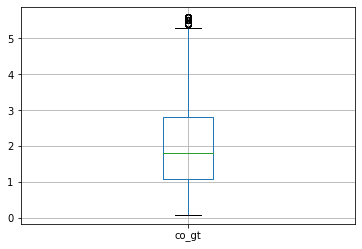

In [20]:
# plot the feature
filt_df = try_df.boxplot(column=['co_gt'])
filt_df.plot()

plt.show()

# pt08_s1_co
#### Hourly averaged sensor response (nominally CO targeted)

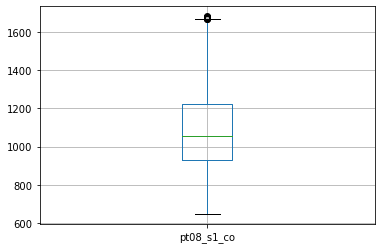

In [21]:
# plot the feature
pt08s1_co = try_df.boxplot(column=['pt08_s1_co'])
pt08s1_co.plot()

plt.show()

# nmhc_gt
#### True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

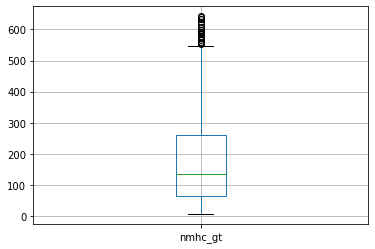

In [22]:
# plot the feature
nmhc_gt = try_df.boxplot(column=['nmhc_gt'])
nmhc_gt.plot()

plt.show()

# c6h6_gt
#### True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

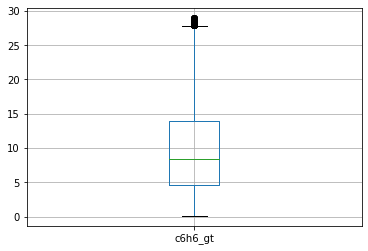

In [23]:
# plot the feature
c6h6_gt = try_df.boxplot(column=['c6h6_gt'])
c6h6_gt.plot()

plt.show()

# pt08_s2_nmhc
#### Hourly averaged sensor response (nominally NMHC targeted)

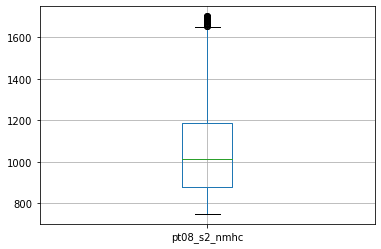

In [24]:
# plot the feature
pt08_s2_nmhc= try_df.boxplot(column=['pt08_s2_nmhc'])
pt08_s2_nmhc.plot()

plt.show()

# nox_gt
#### True hourly averaged NOx concentration in ppb (reference analyzer)

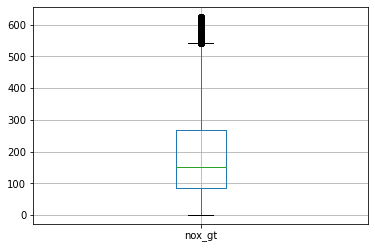

In [25]:
# plot the feature
nox_gt = try_df.boxplot(column=['nox_gt'])
nox_gt.plot()

plt.show()

# pt08_s3_nox
#### Hourly averaged sensor response (nominally NOx targeted)

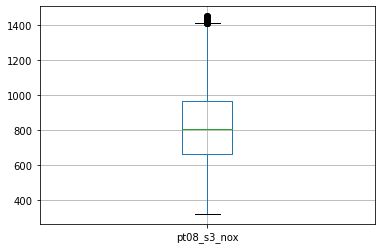

In [26]:
# plot the feature
pt08_s3_nox = try_df.boxplot(column=['pt08_s3_nox'])
pt08_s3_nox.plot()

plt.show()

# no2_gt
#### True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

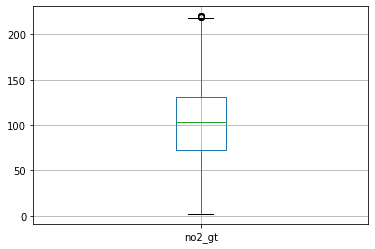

In [27]:
# plot the feature
no2_gt  = try_df.boxplot(column=['no2_gt'])
no2_gt.plot()

plt.show()

# pt08_s4_no2
#### Hourly averaged sensor response (nominally NO2 targeted)

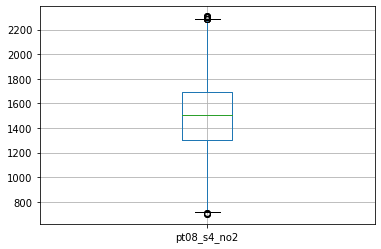

In [28]:
# plot the feature
pt08_s4_no2 = try_df.boxplot(column=['pt08_s4_no2'])
pt08_s4_no2.plot()

plt.show()

# pt08_s5_o3
####  Hourly averaged sensor response (nominally O3 targeted)

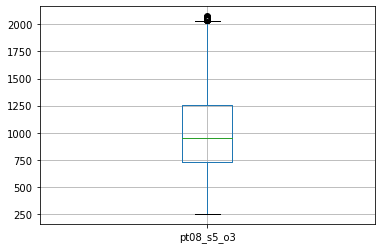

In [29]:
# plot the feature
pt08_s5_o3 = try_df.boxplot(column=['pt08_s5_o3'])
pt08_s5_o3.plot()

plt.show()

# t
#### Temperature in °C

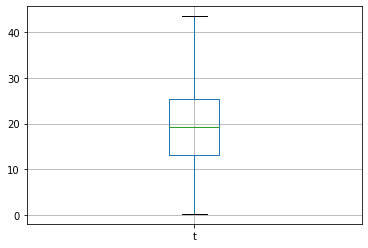

In [30]:
# plot the feature
t = try_df.boxplot(column=['t'])
t.plot()

plt.show()

# rh
#### Relative Humidity (%)

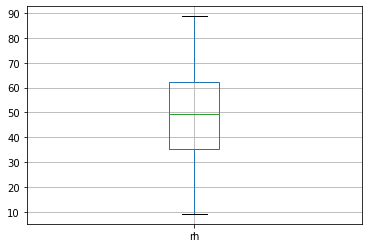

In [31]:
# plot the feature
rh = try_df.boxplot(column=['rh'])
rh.plot()

plt.show()

# ah
#### Absolute Humidity

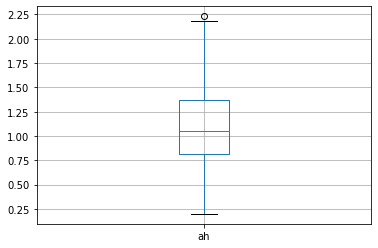

In [32]:
# plot the feature
ah = try_df.boxplot(column=['ah'])
ah.plot()

plt.show()

# Plausible Min / Max hinzufügen 

Create a dataframe which includes the vlaues that are calculated via Excel for all the plausible Min and Max Values.

In [33]:
# create dataframe 
lst = [['0.1','647','7.0','0.1','749','0.1','204','0.1','702','253','0.3','9.2','0.1988'],
      ['5.6','1687','607','28.95','1701.5','625.875','1452','220.5','2310','2074.5','43.85','88.7','2.231']]

pmin = pd.DataFrame(lst, columns = ['co_gt','pt08_s1_co','nmhc_gt','c6h6_gt','pt08_s2_nmhc','nox_gt','pt08_s3_nox','no2_gt','pt08_s4_no2','pt08_s5_o3','t','rh','ah'], index = ['min', 'max'])

pmin

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
min,0.1,647,7.0,0.1,749,0.1,204,0.1,702,253,0.3,9.2,0.1988
max,5.6,1687,607,28.95,1701.5,625.875,1452,220.5,2310,2074.5,43.85,88.7,2.231


Save dataframe as a CSV file. 

In [34]:
pmin.to_csv('PlausMinMaxt.csv', sep = ';')

Update the old FeatureList by the newly Calculatet Plausbile Min/Max Values. 

In [35]:
# Updating Old Featurelist 
PlausFL= pd.concat([featureAna,pmin])
PlausFL

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
count,6159.0,7615.0,859.0,7506.0,5733.0,5966.0,7495.0,6304.0,7584.0,7625.0,7707.0,7709.0,7709.0
mean,2.043871,1089.757321,183.214203,9.795057,1051.347811,193.833389,825.35477,104.85533,1493.76635,1011.02977,19.46956,48.969244,1.082099
std,1.230393,207.10438,149.767756,6.437832,210.126781,143.300945,219.59691,41.937012,310.666962,375.246415,8.654047,17.286378,0.39465
amin,0.1,647.0,7.0,0.1,749.0,2.0,322.0,2.0,702.0,253.0,0.3,9.2,0.1988
25%,1.1,930.0,66.0,4.6,880.0,84.25,667.0,73.0,1303.0,735.0,13.1,35.5,0.8167
50%,1.8,1058.0,137.0,8.4,1014.0,152.0,809.0,103.0,1503.0,956.0,19.3,49.4,1.0468
75%,2.8,1225.0,260.5,13.9,1189.0,267.0,966.0,131.0,1696.25,1256.0,25.4,62.1,1.3713
amax,5.6,1683.0,642.0,28.9,1701.0,625.0,1452.0,220.0,2307.0,2073.0,43.4,88.7,2.231
min,0.1,647,7.0,0.1,749,0.1,204,0.1,702,253,0.3,9.2,0.1988
max,5.6,1687,607,28.95,1701.5,625.875,1452,220.5,2310,2074.5,43.85,88.7,2.231


Drop Values that are not needed in the FeatureList, like "count" and "std". 

In [36]:
# drop 
PlausFL.drop(['count','std'],axis = 0, inplace = True)

In [37]:
# rotate the Dataframe 
PlausFL = PlausFL.transpose()

In [38]:
PlausFL = PlausFL.rename_axis('names')

Because of the newly calculated Min/Max Values we can now drop the old Min and Max. 

In [39]:
# drop  
PlausFL.drop(['amin', 'amax'], axis = 1, inplace =True )

In [40]:
PlausFL

,mean,25%,50%,75%,min,max
names,,,,,,
co_gt,2.043871,1.1,1.8,2.8,0.1,5.6
pt08_s1_co,1089.757321,930.0,1058.0,1225.0,647,1687
nmhc_gt,183.214203,66.0,137.0,260.5,7.0,607
c6h6_gt,9.795057,4.6,8.4,13.9,0.1,28.95
pt08_s2_nmhc,1051.347811,880.0,1014.0,1189.0,749,1701.5
nox_gt,193.833389,84.25,152.0,267.0,0.1,625.875
pt08_s3_nox,825.35477,667.0,809.0,966.0,204,1452
no2_gt,104.85533,73.0,103.0,131.0,0.1,220.5
pt08_s4_no2,1493.76635,1303.0,1503.0,1696.25,702,2310


In [41]:
# save newly created FeatureList as a csv file 
PlausFL.to_csv('02_PlausFeatureList.csv', sep = ';')

In the end, we have a finished feature List that contains all the necessary features and relevant values.